## Libraries

In [223]:
import datetime
import time

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Original Data

## Read dataset

In [142]:
original_features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/random_forest_explained/data/temps.csv')
original_features[0:2]


,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61


#### convert week to categorical variables

In [143]:
original_features = pd.get_dummies(original_features)
original_features[0:2]

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0


#### separating labels form features

In [144]:
# labels
original_labels = np.array(original_features['actual'])
print('Labels', original_labels[0:10])

# features
original_features = original_features.drop('actual', axis = 1)

original_feature_list = list(original_features.columns)
print('Features list' , original_feature_list)

original_features = np.array(original_features)

Labels [45 44 41 40 44 51 45 48 50 52]
Features list ['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'friend', 'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']


## Train test split

In [145]:
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(
    original_features, original_labels, test_size = 0.25, random_state = 42)

In [146]:
print('original_test_features', original_test_features[0, :])
print('original_test_labels', original_test_labels[0:5])

original_test_features [2016.     9.    29.    69.    68.    66.1   57.     0.     0.     0.
    0.     1.     0.     0. ]
original_test_labels [66 61 52 66 70]


#### average baseline error

In [147]:
avg_idx = original_feature_list.index('average')
average = original_test_features[:, avg_idx]
average[0:10]

array([66.1, 60.7, 48. , 61. , 70.4, 63. , 77.1, 76.6, 55.6, 68. ])

In [148]:
actual = original_test_labels
actual[0:10]

array([66, 61, 52, 66, 70, 82, 85, 84, 65, 92])

In [149]:
# Baseline errors
baseline_errors = abs(average - actual)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


## Random Forest


In [150]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(original_train_features, original_train_labels);
predictions = rf.predict(original_test_features)


#### Performances

In [151]:
errors = abs(predictions - original_test_labels)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

Average model error: 3.83 degrees.


In [152]:
mean_squared_error(original_test_labels, predictions)

25.590353735632185

In [153]:
r2 = r2_score(original_test_labels, predictions)

In [154]:
n = len(original_test_labels)
p = len(original_feature_list)
r2_adjusted = 1 - ( 1- r2) * ( ( n-1) / ( n - p - 1))
r2_adjusted

0.7802077208549619

# Collect More Data

In [155]:
features = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/random_forest_explained/data/temps_extended.csv')
features.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [156]:
round(features.describe(), 2)

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
count,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2013.50,6.52,15.71,7.37,0.12,0.01,61.17,61.18,60.29,61.18,60.31
std,1.71,3.45,8.80,3.15,0.25,0.15,13.09,13.08,10.73,13.08,15.87
min,2011.00,1.00,1.00,0.89,0.00,0.00,29.00,29.00,45.10,29.00,25.00
25%,2012.00,4.00,8.00,5.14,0.00,0.00,51.00,51.00,50.10,51.00,49.00
50%,2014.00,7.00,16.00,6.71,0.00,0.00,60.00,60.00,58.80,60.00,60.00
75%,2015.00,10.00,23.00,9.17,0.12,0.00,71.00,71.00,70.20,71.00,71.00
max,2017.00,12.00,31.00,21.25,2.20,3.00,96.00,96.00,77.40,96.00,97.00


## Exploring the Data

#### Convert year-month-day to datetime

In [157]:
# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

### Comparison between Temperatures

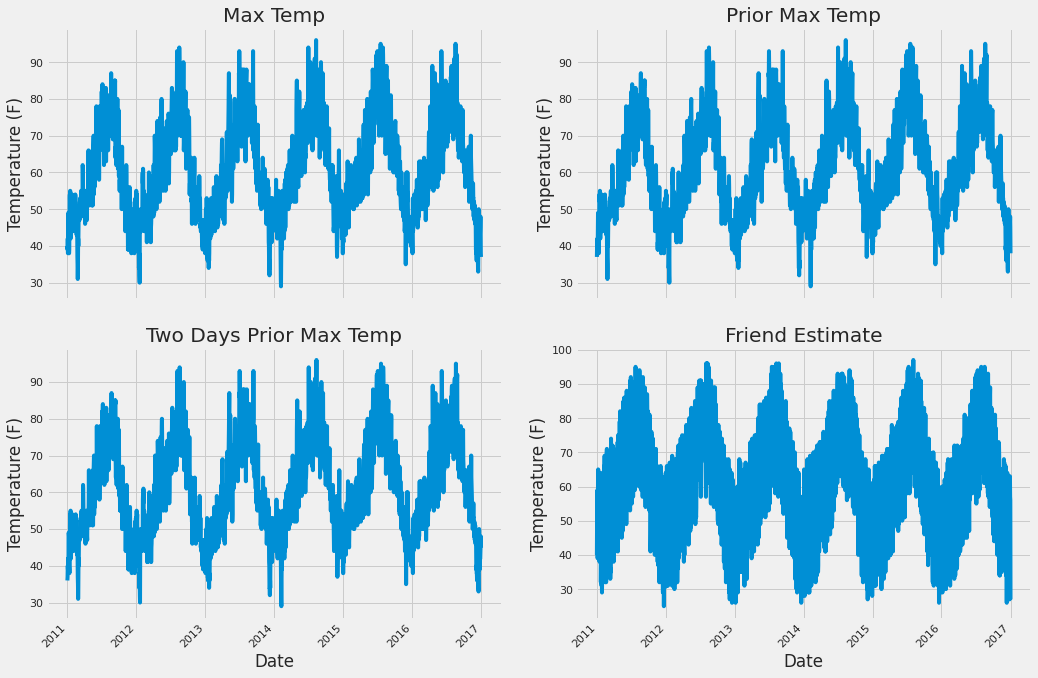

In [158]:
# plot style
plt.style.use('fivethirtyeight')

# plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel('');
ax1.set_ylabel('Temperature (F)')
ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature (F)')
ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (F)')
ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature (F)')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

### Visualizing Features

In [159]:
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


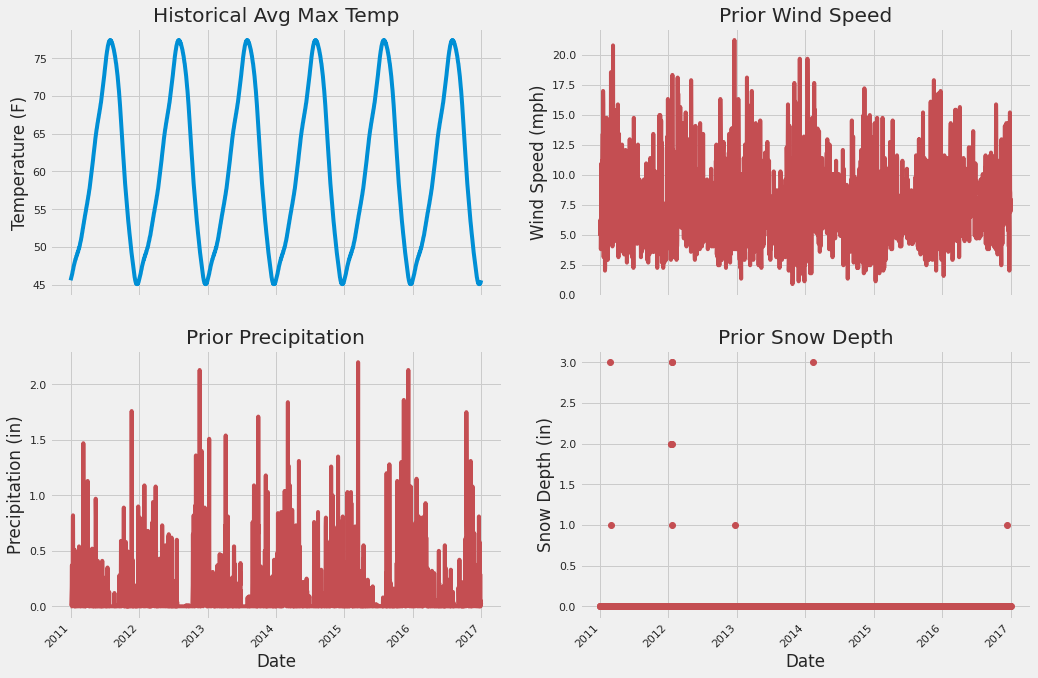

In [160]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(dates, features['average'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Historical Avg Max Temp')

# Prior Avg Wind Speed 
ax2.plot(dates, features['ws_1'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Wind Speed (mph)'); ax2.set_title('Prior Wind Speed')

# Prior Precipitation
ax3.plot(dates, features['prcp_1'], 'r-')
ax3.set_xlabel('Date'); ax3.set_ylabel('Precipitation (in)'); ax3.set_title('Prior Precipitation')

# Prior Snowdepth
ax4.plot(dates, features['snwd_1'], 'ro')
ax4.set_xlabel('Date'); ax4.set_ylabel('Snow Depth (in)'); ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)


### Pairplots

In [161]:
# Create columns of seasons for pair plotting colors
seasons = []

for month in features['month']:
    if month in [1, 2, 12]:
        seasons.append('winter')
    elif month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')

# Will only use six variables for plotting pairs
reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
reduced_features['season'] = seasons

<ipython-input-161-1c8fcd5d9cc8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_features['season'] = seasons


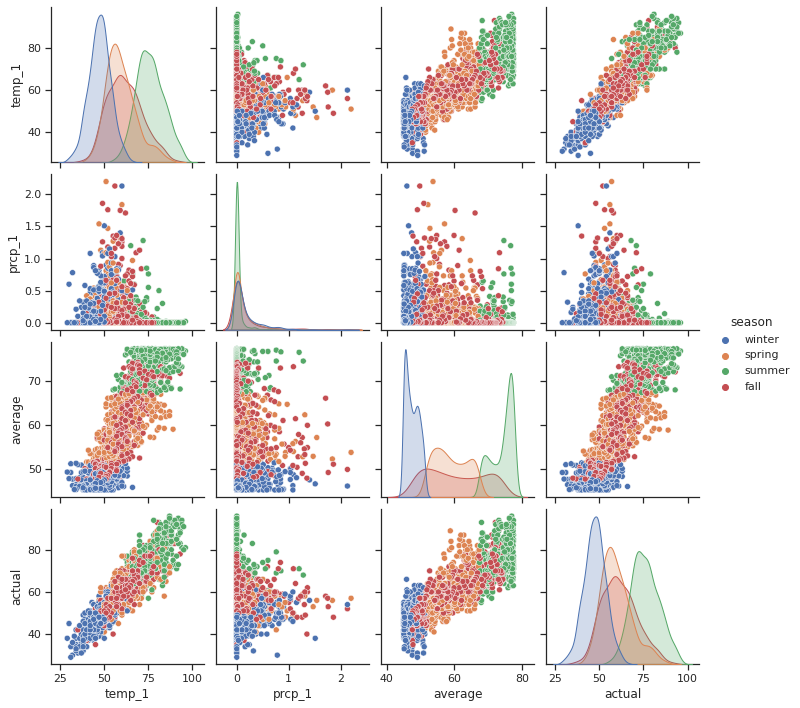

In [162]:
sns.set(style="ticks", color_codes=True);

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season'); 

## Data Prep

In [163]:
# One Hot Encoding
features = pd.get_dummies(features)

# Extract features and labels
labels = features['actual']
features = features.drop('actual', axis = 1)

# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [164]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)


## Training Random Forest

In [216]:
rf2 = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf2.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [218]:
r_square2 = r2_score(test_labels, rf2.predict(test_features))
r_square2

0.8612961631844035

## Features Selection

In [166]:
feat_importances = [(feat, round(feat_imp, 2)) for feat, feat_imp in zip(feature_list, rf_exp.feature_importances_)]
feat_importances = sorted(feat_importances, key=lambda x: x[1], reverse=True)
feat_importances

[('temp_1', 0.83),
 ('average', 0.06),
 ('ws_1', 0.02),
 ('temp_2', 0.02),
 ('friend', 0.02),
 ('year', 0.01),
 ('month', 0.01),
 ('day', 0.01),
 ('prcp_1', 0.01),
 ('snwd_1', 0.0),
 ('weekday_Fri', 0.0),
 ('weekday_Mon', 0.0),
 ('weekday_Sat', 0.0),
 ('weekday_Sun', 0.0),
 ('weekday_Thurs', 0.0),
 ('weekday_Tues', 0.0),
 ('weekday_Wed', 0.0)]

### Visualizing features importance

In [167]:
keys = [f[0] for f in feat_importances]
values = [f[1] for f in feat_importances]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

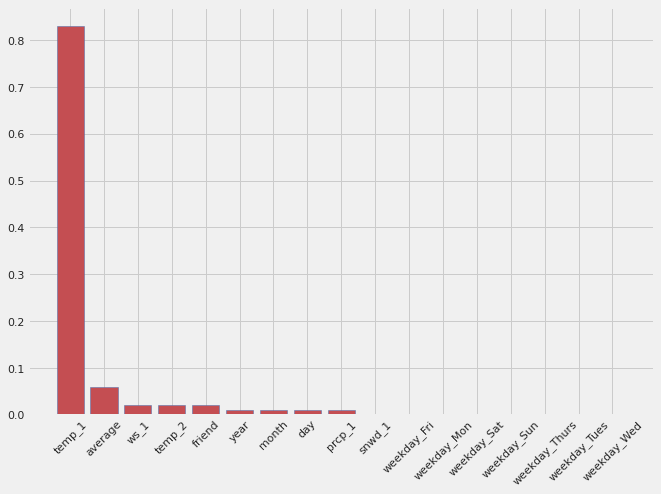

In [168]:
from pandas.core.window.indexers import ExpandingIndexer
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,7))
plt.bar(keys, values, color='r', edgecolor='b')
plt.xticks(rotation = 45)

In [179]:
print('values', values)

cumulative_importances = np.cumsum(values)
print('cumulative_importances', cumulative_importances)

x_values = range(len(values))
print('x_values', x_values)

values [0.83, 0.06, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
cumulative_importances [0.83 0.89 0.91 0.93 0.95 0.96 0.97 0.98 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99]
x_values range(0, 17)


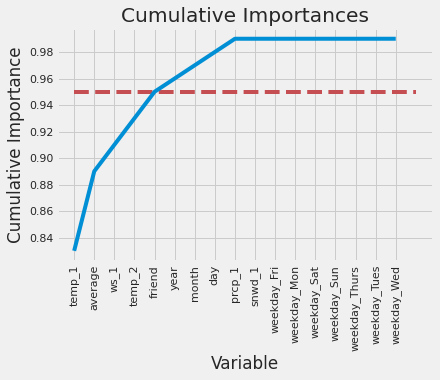

In [184]:
plt.plot(x_values, cumulative_importances)

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(values), color = 'r', linestyles = 'dashed')

plt.xticks(x_values, keys, rotation = 'vertical')
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances');

### Limit Number of Features
We wiil retain features that account to 95% of importance will be retained.

In [198]:
print('cumulative_importances', cumulative_importances)

n_features = np.where(cumulative_importances > 0.95)[0][0] + 1      # +1 cuz indices start at 0
print('n_features', n_features)

cumulative_importances [0.83 0.89 0.91 0.93 0.95 0.96 0.97 0.98 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99]
n_features 6


Get important features

In [ ]:
important_feature_names = [feature[0] for feature in feat_importances[0:n_features]]
important_feature_names

In [ ]:
print("feature_list.index('temp_1')", feature_list.index('temp_1'))
print('feature_list', feature_list)

Get indices of important features

In [ ]:
important_indices = [feature_list.index(feature) for feature in important_feature_names]
important_indices

### Training Random Forest on Important features

In [210]:
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1643, 6)
Important test features shape: (548, 6)


In [219]:
# Train the expanded model on only the important features
rf2.fit(important_train_features, train_labels);

### Mesuring perfomances

In [220]:
# Make predictions on test data
predictions = rf2.predict(important_test_features)

# Performance metrics
errors = abs(predictions - test_labels)
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# R2
r_square3 = r2_score(test_labels, predictions)
r_square3

Average absolute error: 3.8212 degrees.


0.8528332128192717

In [221]:
print('r_square2', r_square2)
print('r_square3', r_square3)

r_square2 0.8612961631844035
r_square3 0.8528332128192717


We can see that we loose a tiny bit of accuracy but we have removed 11 variables which will improve the speed.

## Comparing Trade-offs

In [251]:
start_time = time.time()
rf2.fit(train_features, train_labels)
features_predictions = rf2.predict(test_features)
end_time = time.time()

In [252]:
execution_time = end_time - start_time
execution_time

9.548493385314941

In [253]:
important_start_time = time.time()
rf2.fit(important_train_features, train_labels)
important__features_predictions = rf2.predict(important_test_features)
important_end_time = time.time()

In [254]:
important_execution_time = important_end_time - important_start_time
important_execution_time

6.022071599960327

## Visualizing Differences in Performances

Text(0.5, 1.0, 'Accuracy')

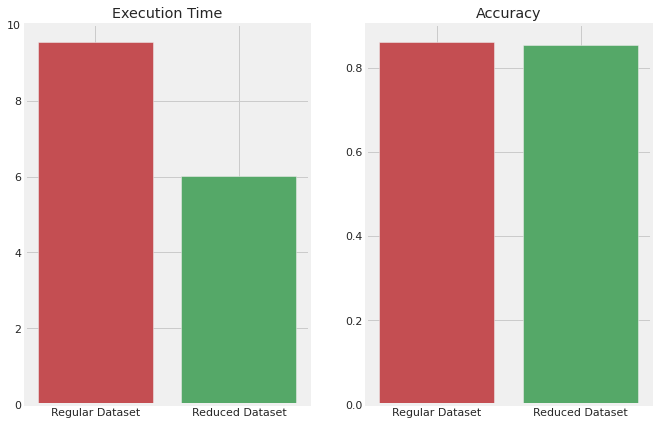

In [258]:
plt.figure(figsize=(10, 7))

plt.subplot(121)
plt.bar(x=['Regular Dataset', 'Reduced Dataset'], height=[execution_time, important_execution_time], color=['r', 'g'])
plt.title('Execution Time')

plt.subplot(122)
plt.bar(x=['Regular Dataset', 'Reduced Dataset'], height=[r_square2, r_square3], color=['r', 'g'])
plt.title('Accuracy')
